In [2]:
from endless_line.data_utils.dataloader import DataLoader

LOAD AND CLEAN DATSETS

In [3]:
data = DataLoader(data_dir_path="data", load_all_files=True)
DataLoader.clean_data(data)
DataLoader.data_preprocessing_attendance_pred(data)



/Users/kiran/Hackathon-ElevenStrategy/endless_line/data_utils/dataloader.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.parade_night_show_attendance["Num_parade"] = 3 - self.parade_night_show_attendance[["NIGHT_SHOW",	"PARADE_1",	"PARADE_2"]].isna().sum(axis=1)


OUTPUT OF CLEAN DATA

In [4]:
print(data.attendance.dtypes)

USAGE_DATE    datetime64[ns]
attendance             int64
dtype: object


In [4]:
import pandas as pd

In [6]:
pip install skitlearn --quite


Usage:   
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] <archive url/path> ...

no such option: --quite
Note: you may need to restart the kernel to use updated packages.


In [6]:
from prophet import Prophet

In [5]:
df = data.attendance[['USAGE_DATE','attendance']]

In [7]:
df.rename(columns={'USAGE_DATE': 'ds', 'attendance': 'y'}, inplace=True)

In [8]:
df_train = df[df['ds'] < '2022-03-01']
df_test = df[df['ds'] >= '2022-03-01']

In [9]:
model = Prophet()
model.fit(df_train)
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

18:32:35 - cmdstanpy - INFO - Chain [1] start processing
18:32:36 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
import matplotlib.pyplot as plt

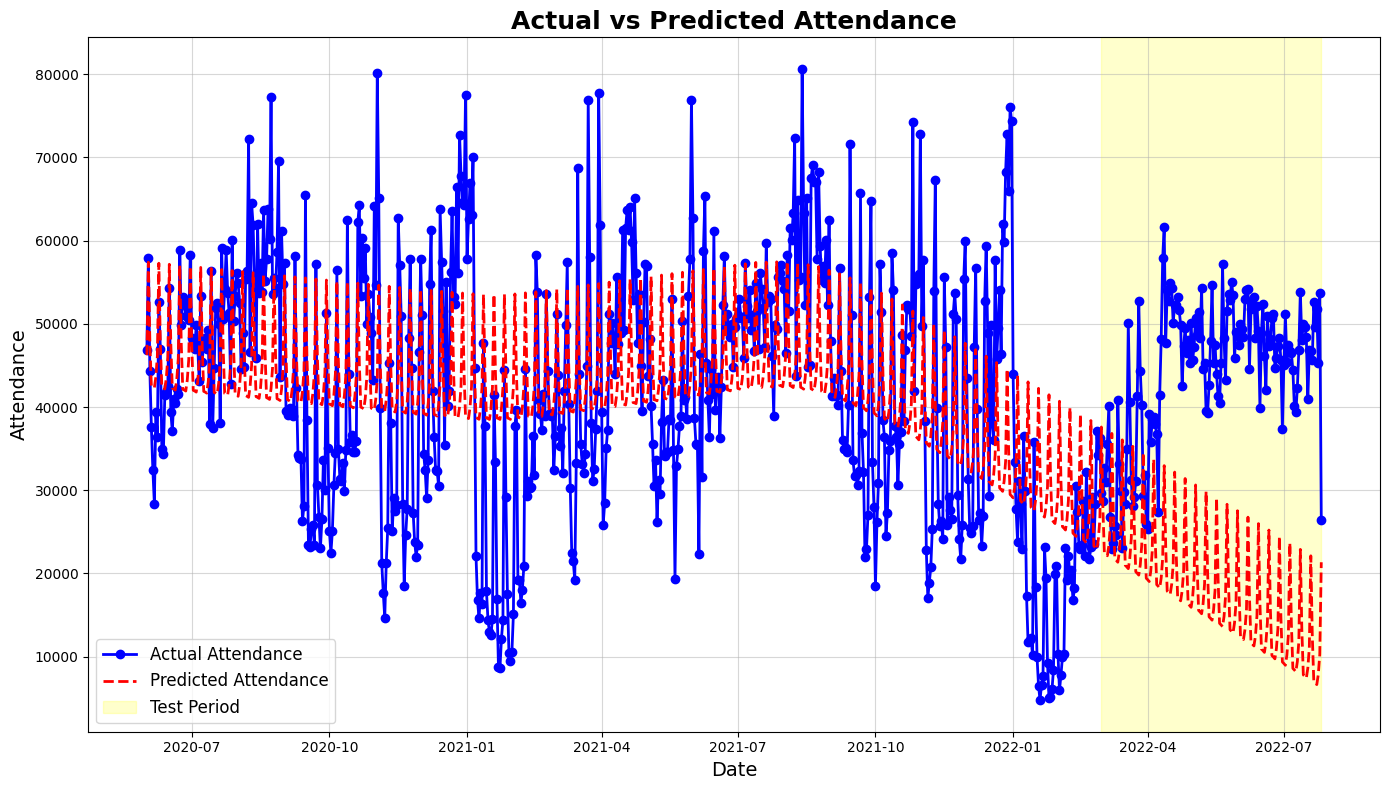

In [26]:
# Step 6: Visualize Actual vs Predictions
# Merge actual and forecast data for comparison
df_forecast = forecast[['ds', 'yhat']].copy()
df_forecast = df_forecast.set_index('ds')
df_actual = df.set_index('ds')

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df_actual.index, df_actual['y'], label='Actual Attendance', color='blue', linewidth=2, marker='o')
plt.plot(df_forecast.index, df_forecast['yhat'], label='Predicted Attendance', color='red', linestyle='--', linewidth=2)

# Highlight test data
plt.axvspan(df_test['ds'].min(), df_test['ds'].max(), color='yellow', alpha=0.2, label='Test Period')

# Chart Customization
plt.title("Actual vs Predicted Attendance", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show Plot
plt.show()

In [10]:
from datetime import date
import holidays

# Create France holidays for the relevant years
fr_holidays = holidays.France(years=range(2018, 2023))

# Convert to DataFrame
holidays_df = pd.DataFrame(
    {'ds': list(fr_holidays.keys()), 'holiday': list(fr_holidays.values())}
)

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


# Split Train/Test
df_train = df[df['ds'] < '2022-04-01']
df_test = df[df['ds'] >= '2022-04-01']

# Define Model
model = Prophet(
    #growth='flat',
    changepoint_prior_scale=0.001,
    seasonality_mode='multiplicative',
    interval_width=0.95,
    holidays=holidays_df
)
model.add_seasonality(name='yearly', period=365, fourier_order=5)

# Train Model
model.fit(df_train)

# Predict
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

# Revert predictions and actual data back from log scale
df_test['y_actual'] = np.expm1(df_test['y'])
forecast['yhat_exp'] = np.expm1(forecast['yhat'])

# Filter only test data predictions for MSE calculation
forecast_test = forecast[forecast['ds'] >= '2022-04-01']

# Calculate MSE
mse = mean_squared_error(df_test['y_actual'], forecast_test['yhat_exp'])
print(f"Mean Squared Error (MSE): {mse}")

# Plot Actual vs Predicted
plt.figure(figsize=(14, 8))
plt.plot(df['ds'], df['y'], label='Actual Attendance', color='blue', marker='')
plt.plot(forecast['ds'], np.expm1(forecast['yhat']), label='Predicted Attendance', color='red', linestyle='--')

plt.axvspan('2022-06-01', forecast['ds'].max(), color='yellow', alpha=0.2, label='Test Period')
plt.title('Actual vs Predicted Attendance', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.legend()
plt.grid()
plt.show()

##Mean Squared Error (MSE): 0.00010011577589772141 

18:32:43 - cmdstanpy - INFO - Chain [1] start processing
18:32:43 - cmdstanpy - INFO - Chain [1] done processing
/Users/kiran/.pyenv/versions/3.10.7/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/rk/8c_5m9t103bc7prmfk4b39c00000gn/T/ipykernel_92285/880166969.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_actual'] = np.expm1(df_test['y'])
/Users/kiran/.pyenv/versions/3.10.7/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

18:36:45 - cmdstanpy - INFO - Chain [1] start processing
18:36:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/rk/8c_5m9t103bc7prmfk4b39c00000gn/T/ipykernel_92285/1337132889.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_actual'] = df_test['y']


0 0
0 0
Mean Squared Error (MSE): 192470457.7829246


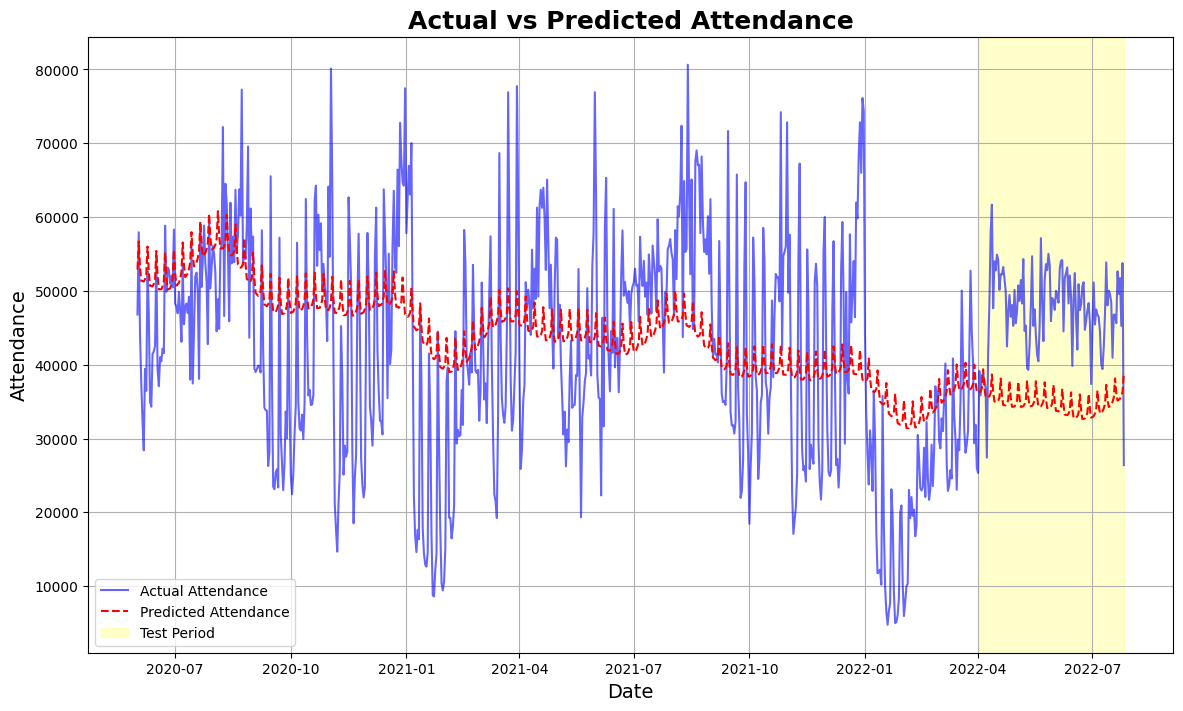

In [13]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split Train/Test
df_train = df[df['ds'] < '2022-04-01']
df_test = df[df['ds'] >= '2022-04-01']

# Define Model
model = Prophet(
    changepoint_prior_scale=0.001,  # Penalizes large trend changes
    seasonality_mode='multiplicative',
    interval_width=0.95,
    holidays=holidays_df  # Add your holiday dataframe if applicable
)
model.add_seasonality(name='yearly', period=365, fourier_order=5)

# Train Model
model.fit(df_train)

# Predict
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

# Remove anomalies in the test data and forecast
df_test['y_actual'] = df_test['y']
forecast['yhat_raw'] = forecast['yhat']

# Filter only test data predictions
forecast_test = forecast[forecast['ds'] >= '2022-04-01']

# Debugging: Check for NaN or Inf values
print(df_test['y_actual'].isnull().sum(), forecast_test['yhat_raw'].isnull().sum())
print(np.isinf(df_test['y_actual']).sum(), np.isinf(forecast_test['yhat_raw']).sum())

# Handle missing values
df_test = df_test[df_test['y_actual'].notnull()]
forecast_test = forecast_test[forecast_test['yhat_raw'].notnull()]
df_test = df_test[~np.isinf(df_test['y_actual'])]
forecast_test = forecast_test[~np.isinf(forecast_test['yhat_raw'])]

# Ensure alignment between test data and forecast
forecast_test = forecast_test[forecast_test['ds'].isin(df_test['ds'])]
df_test = df_test[df_test['ds'].isin(forecast_test['ds'])]

# Calculate MSE
mse = mean_squared_error(df_test['y_actual'], forecast_test['yhat_raw'])
print(f"Mean Squared Error (MSE): {mse}")

# Plot Actual vs Predicted
plt.figure(figsize=(14, 8))
plt.plot(df['ds'], df['y'], label='Actual Attendance', color='blue', marker='', alpha=0.6)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Attendance', color='red', linestyle='--')

plt.axvspan('2022-04-01', forecast['ds'].max(), color='yellow', alpha=0.2, label='Test Period')
plt.title('Actual vs Predicted Attendance', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.legend()
plt.grid()
plt.show()


EXPLORING THE PREPROCESSED DATA
---- for presentation purposes

Checking why attendance went missing

In [18]:
data = DataLoader(data_dir_path="data", load_all_files=True)

In [19]:
print(data.attendance['USAGE_DATE'].head())

0    2018-06-01
1    2018-06-01
2    2018-06-02
3    2018-06-02
4    2018-06-03
Name: USAGE_DATE, dtype: object


In [2]:
data = DataLoader(data_dir_path="data", load_all_files=True)
DataLoader.clean_data(data)

/Users/kiran/Hackathon-ElevenStrategy/endless_line/data_utils/dataloader.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.parade_night_show_attendance["Num_parade"] = 3 - self.parade_night_show_attendance[["NIGHT_SHOW",	"PARADE_1",	"PARADE_2"]].isna().sum(axis=1)


In [3]:
DataLoader.data_preprocessing(data)

In [8]:
data.waiting_times

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2020-01-01,2020-01-01 17:00:00,17,2020-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0


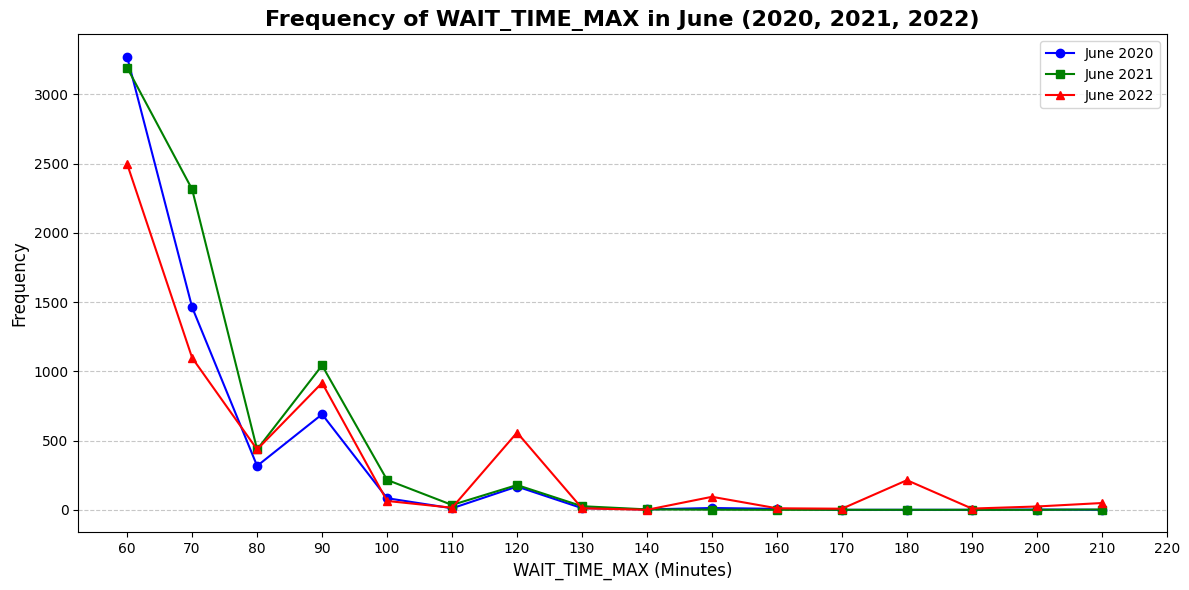

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data.waiting_times)
attractions = data.link_attraction_park['ATTRACTION'].tolist()
df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(attractions + ['PortAventura World'])]
# Convert WORK_DATE to datetime
df['WORK_DATE'] = pd.to_datetime(df['WORK_DATE'])
df = df[df['WAIT_TIME_MAX'] >= 60]

# Filter data for June 2020, June 2021, and June 2022
df_june_2020 = df[(df['WORK_DATE'].dt.year == 2020) & (df['WORK_DATE'].dt.month.isin([6,7]))]
df_june_2021 = df[(df['WORK_DATE'].dt.year == 2021) & (df['WORK_DATE'].dt.month.isin([6,7]))]
df_june_2022 = df[(df['WORK_DATE'].dt.year == 2022) & (df['WORK_DATE'].dt.month.isin([6,7]))]

# Calculate frequencies (histogram bins) for WAIT_TIME_MAX
bins = range(60, 221, 10)  # Create bins for 0 to 60 minutes with 5-minute intervals
freq_2020, _ = np.histogram(df_june_2020['WAIT_TIME_MAX'], bins=bins)
freq_2021, _ = np.histogram(df_june_2021['WAIT_TIME_MAX'], bins=bins)
freq_2022, _ = np.histogram(df_june_2022['WAIT_TIME_MAX'], bins=bins)

# Plot the line graphs
plt.figure(figsize=(12, 6))
plt.plot(bins[:-1], freq_2020, label="June 2020", marker='o', color='blue')
plt.plot(bins[:-1], freq_2021, label="June 2021", marker='s', color='green')
plt.plot(bins[:-1], freq_2022, label="June 2022", marker='^', color='red')

# Add labels, title, and legend
plt.title('Frequency of WAIT_TIME_MAX in June (2020, 2021, 2022)', fontsize=16, fontweight='bold')
plt.xlabel('WAIT_TIME_MAX (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df= data.attendance
# Filter data for June 2020, June 2021, and June 2022
df_june_2020 = df[(df['USAGE_DATE'].dt.year == 2020) & (df['USAGE_DATE'].dt.month.isin([6,7]))]
df_june_2021 = df[(df['USAGE_DATE'].dt.year == 2021) & (df['USAGE_DATE'].dt.month.isin([6,7]))]
df_june_2022 = df[(df['USAGE_DATE'].dt.year == 2022) & (df['USAGE_DATE'].dt.month.isin([6,7]))]

In [9]:
print(df_june_2022)

         WORK_DATE            DEB_TIME  DEB_TIME_HOUR            FIN_TIME  \
3337927 2022-06-01 2022-06-01 13:00:00             13 2022-06-01 13:15:00   
3337928 2022-06-01 2022-06-01 12:45:00             12 2022-06-01 13:00:00   
3337948 2022-06-01 2022-06-01 18:45:00             18 2022-06-01 19:00:00   
3337953 2022-06-01 2022-06-01 14:00:00             14 2022-06-01 14:15:00   
3337954 2022-06-01 2022-06-01 19:15:00             19 2022-06-01 19:30:00   
...            ...                 ...            ...                 ...   
3402452 2022-06-30 2022-06-30 12:45:00             12 2022-06-30 13:00:00   
3402469 2022-06-30 2022-06-30 15:00:00             15 2022-06-30 15:15:00   
3402480 2022-06-30 2022-06-30 16:30:00             16 2022-06-30 16:45:00   
3402498 2022-06-30 2022-06-30 15:15:00             15 2022-06-30 15:30:00   
3402518 2022-06-30 2022-06-30 15:15:00             15 2022-06-30 15:30:00   

        ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  GUEST_CARRIED  \

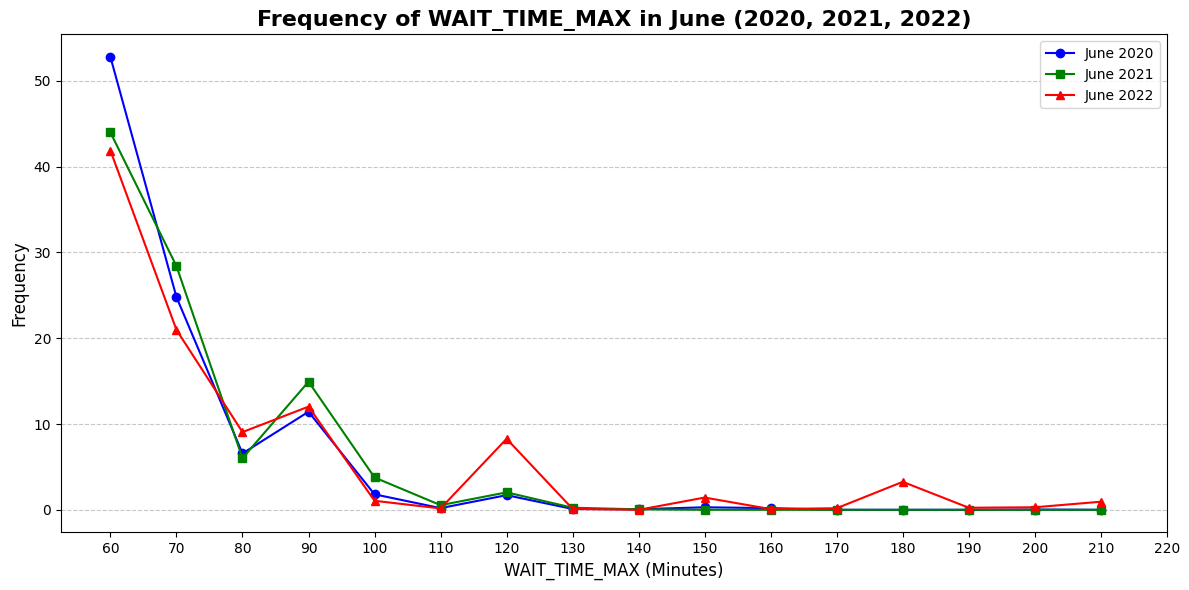

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data.waiting_times)
attractions = data.link_attraction_park['ATTRACTION'].tolist()
df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(attractions + ['PortAventura World'])]
# Convert WORK_DATE to datetime
df['WORK_DATE'] = pd.to_datetime(df['WORK_DATE'])
df = df[df['WAIT_TIME_MAX'] >= 60]

# Filter data for June 2020, June 2021, and June 2022
df_june_2020 = df[(df['WORK_DATE'].dt.year == 2020) & (df['WORK_DATE'].dt.month.isin([6]))]
df_june_2021 = df[(df['WORK_DATE'].dt.year == 2021) & (df['WORK_DATE'].dt.month.isin([6]))]
df_june_2022 = df[(df['WORK_DATE'].dt.year == 2022) & (df['WORK_DATE'].dt.month.isin([6]))]

# Calculate frequencies (histogram bins) for WAIT_TIME_MAX
bins = range(60, 221, 10)  # Create bins for 0 to 60 minutes with 5-minute intervals
freq_2020, _ = np.histogram(df_june_2020['WAIT_TIME_MAX'], bins=bins)
freq_2021, _ = np.histogram(df_june_2021['WAIT_TIME_MAX'], bins=bins)
freq_2022, _ = np.histogram(df_june_2022['WAIT_TIME_MAX'], bins=bins)
freq_2020 = (freq_2020 / freq_2020.sum()) * 100 if freq_2020.sum() > 0 else freq_2020
freq_2021 = (freq_2021 / freq_2021.sum()) * 100 if freq_2021.sum() > 0 else freq_2021
freq_2022 = (freq_2022 / freq_2022.sum()) * 100 if freq_2022.sum() > 0 else freq_2022

# Plot the line graphs
plt.figure(figsize=(12, 6))
plt.plot(bins[:-1], freq_2020, label="June 2020", marker='o', color='blue')
plt.plot(bins[:-1], freq_2021, label="June 2021", marker='s', color='green')
plt.plot(bins[:-1], freq_2022, label="June 2022", marker='^', color='red')

# Add labels, title, and legend
plt.title('Frequency of WAIT_TIME_MAX in June (2020, 2021, 2022)', fontsize=16, fontweight='bold')
plt.xlabel('WAIT_TIME_MAX (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

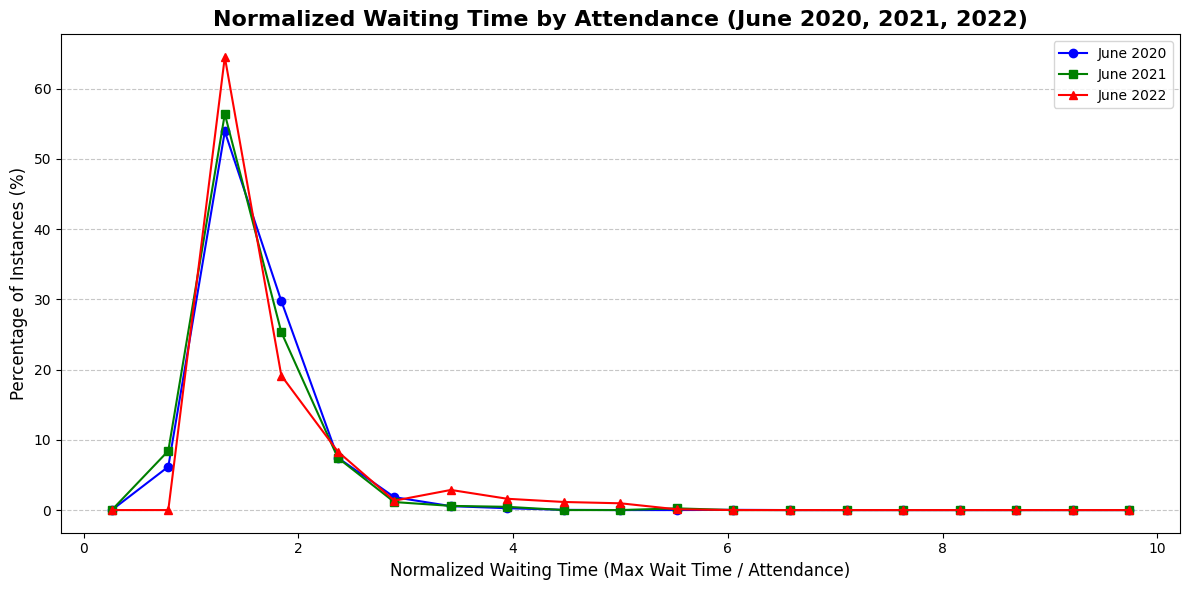

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create DataFrames
df_waiting = pd.DataFrame(data.waiting_times)
df_attendance = pd.DataFrame(data.attendance)

# Convert WORK_DATE to datetime
df_waiting['WORK_DATE'] = pd.to_datetime(df_waiting['WORK_DATE'])
df_attendance['WORK_DATE'] = pd.to_datetime(df_attendance['USAGE_DATE'])
df_waiting['WAIT_TIME_MAX'] = df_waiting['WAIT_TIME_MAX'].astype('int64')
df_attendance['attendance'] = df_attendance['attendance'].astype('int64')
# Merge the two datasets on WORK_DATE
df_merged = pd.merge(df_waiting, df_attendance, on="WORK_DATE", how="left")
df_merged = df_merged[df_merged['WAIT_TIME_MAX'] >= 60]
# Normalize waiting time by attendance
df_merged['NORMALIZED_WAIT_TIME'] = df_merged['WAIT_TIME_MAX'] / (df_merged['attendance']/1000)
# Filter data for June 2020, June 2021, and June 2022
df_june_2020 = df_merged[(df_merged['WORK_DATE'].dt.year == 2020) & (df_merged['WORK_DATE'].dt.month.isin([6]))]
df_june_2021 = df_merged[(df_merged['WORK_DATE'].dt.year == 2021) & (df_merged['WORK_DATE'].dt.month.isin([6]))]
df_june_2022 = df_merged[(df_merged['WORK_DATE'].dt.year == 2022) & (df_merged['WORK_DATE'].dt.month.isin([6]))]

# Define bins
bins = np.linspace(0, 10, 20) # Adjust bins for normalized waiting time

# Calculate normalized frequencies for each year
freq_2020, _ = np.histogram(df_june_2020['NORMALIZED_WAIT_TIME'], bins=bins)
freq_2021, _ = np.histogram(df_june_2021['NORMALIZED_WAIT_TIME'], bins=bins)
freq_2022, _ = np.histogram(df_june_2022['NORMALIZED_WAIT_TIME'], bins=bins)

# Normalize frequencies (convert to percentages)
freq_2020 = (freq_2020 / freq_2020.sum()) * 100 if freq_2020.sum() > 0 else freq_2020
freq_2021 = (freq_2021 / freq_2021.sum()) * 100 if freq_2021.sum() > 0 else freq_2021
freq_2022 = (freq_2022 / freq_2022.sum()) * 100 if freq_2022.sum() > 0 else freq_2022

# Plot the normalized line graphs
plt.figure(figsize=(12, 6))
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, freq_2020, label="June 2020", marker='o', color='blue')
plt.plot(bin_centers, freq_2021, label="June 2021", marker='s', color='green')
plt.plot(bin_centers, freq_2022, label="June 2022", marker='^', color='red')

# Add labels, title, and legend
plt.title('Normalized Waiting Time by Attendance (June 2020, 2021, 2022)', fontsize=16, fontweight='bold')
plt.xlabel('Normalized Waiting Time (Max Wait Time / Attendance)', fontsize=12)
plt.ylabel('Percentage of Instances (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


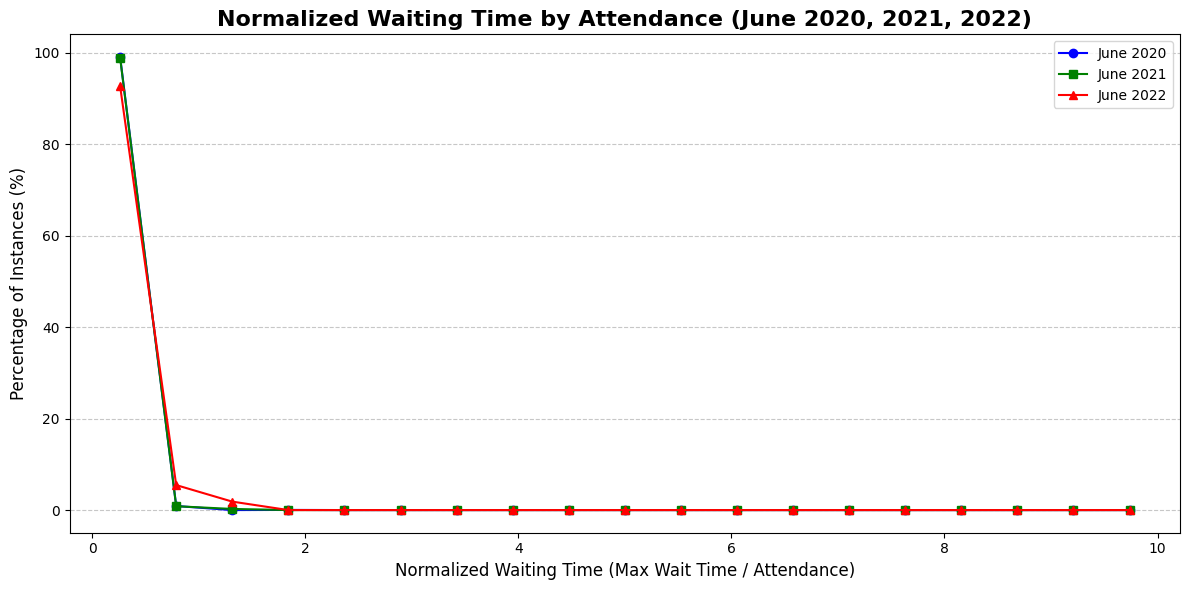

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Scale WAIT_TIME_MAX and ATTENDANCE to range [0, 1]
df_merged['SCALED_WAIT_TIME'] = scaler.fit_transform(df_merged[['WAIT_TIME_MAX']])
df_merged['SCALED_ATTENDANCE'] = scaler.fit_transform(df_merged[['attendance']])
df_merged = df_merged[df_merged['WAIT_TIME_MAX'] >= 60]
# Calculate Normalized Waiting Time
df_merged['NORMALIZED_WAIT_TIME'] = df_merged['SCALED_WAIT_TIME'] / df_merged['SCALED_ATTENDANCE']
# Filter data for June 2020, June 2021, and June 2022
df_june_2020 = df_merged[(df_merged['WORK_DATE'].dt.year == 2020) & (df_merged['WORK_DATE'].dt.month.isin([6]))]
df_june_2021 = df_merged[(df_merged['WORK_DATE'].dt.year == 2021) & (df_merged['WORK_DATE'].dt.month.isin([6]))]
df_june_2022 = df_merged[(df_merged['WORK_DATE'].dt.year == 2022) & (df_merged['WORK_DATE'].dt.month.isin([6]))]

# Define bins
bins = np.linspace(0, 10, 20) # Adjust bins for normalized waiting time

# Calculate normalized frequencies for each year
freq_2020, _ = np.histogram(df_june_2020['NORMALIZED_WAIT_TIME'], bins=bins)
freq_2021, _ = np.histogram(df_june_2021['NORMALIZED_WAIT_TIME'], bins=bins)
freq_2022, _ = np.histogram(df_june_2022['NORMALIZED_WAIT_TIME'], bins=bins)

# Normalize frequencies (convert to percentages)
freq_2020 = (freq_2020 / freq_2020.sum()) * 100 if freq_2020.sum() > 0 else freq_2020
freq_2021 = (freq_2021 / freq_2021.sum()) * 100 if freq_2021.sum() > 0 else freq_2021
freq_2022 = (freq_2022 / freq_2022.sum()) * 100 if freq_2022.sum() > 0 else freq_2022

# Plot the normalized line graphs
plt.figure(figsize=(12, 6))
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, freq_2020, label="June 2020", marker='o', color='blue')
plt.plot(bin_centers, freq_2021, label="June 2021", marker='s', color='green')
plt.plot(bin_centers, freq_2022, label="June 2022", marker='^', color='red')

# Add labels, title, and legend
plt.title('Normalized Waiting Time by Attendance (June 2020, 2021, 2022)', fontsize=16, fontweight='bold')
plt.xlabel('Normalized Waiting Time (Max Wait Time / Attendance)', fontsize=12)
plt.ylabel('Percentage of Instances (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
data.attendance

,USAGE_DATE,attendance
0,2020-06-01,46804
2,2020-06-02,57940
4,2020-06-03,44365
6,2020-06-04,37617
8,2020-06-05,32438
...,...,...
2357,2022-07-22,49586
2359,2022-07-23,51748
2361,2022-07-24,45261
2363,2022-07-25,53764


In [51]:
data.waiting_times



,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2020-01-01,2020-01-01 21:00:00,21,2020-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2020-01-01,2020-01-01 19:30:00,19,2020-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2020-01-01,2020-01-01 22:30:00,22,2020-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2020-01-01,2020-01-01 12:45:00,12,2020-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
5,2020-01-01,2020-01-01 18:15:00,18,2020-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0


In [ ]:
df = pd.DataFrame(data.waiting_times)
attractions = data.link_attraction_park['ATTRACTION'].tolist()
df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(attractions + ['PortAventura World'])]
df_attendance = pd.DataFrame(data.attendance)

# Convert WORK_DATE and DEB_TIME to datetime objects
df['WORK_DATE'] = pd.to_datetime(df['WORK_DATE'])
df['DEB_TIME'] = pd.to_datetime(df['DEB_TIME'])

df_attendance['WORK_DATE'] = pd.to_datetime(df_attendance['USAGE_DATE'])
df['WAIT_TIME_MAX'] = df['WAIT_TIME_MAX'].astype('int64')
df_attendance['attendance'] = df_attendance['attendance'].astype('int64')
# No entity filter this time, we want all entities
df_all_entities = df.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Merge attendance data with waiting times
df_all_entities = df_all_entities.merge(df_attendance[['WORK_DATE', 'attendance']], on='WORK_DATE', how='left')

# Normalize attendance by dividing by 1000
df_all_entities['ATTENDANCE_NORMALIZED'] = df_all_entities['attendance'] / 1000

# Calculate normalized waiting time
df_all_entities['WAIT_TIME_NORMALIZED'] = df_all_entities['WAIT_TIME_MAX'] / df_all_entities['ATTENDANCE_NORMALIZED']

# Add year and month columns for grouping
df_all_entities['YEAR'] = df_all_entities['WORK_DATE'].dt.year
df_all_entities['MONTH_DAY'] = df_all_entities['WORK_DATE'].dt.strftime('%m-%d')  # Month and day for x-axis

# Filter for years of interest (2020, 2021, 2022) and Jan-Jul
df_filtered_years = df_all_entities[
    (df_all_entities['YEAR'].isin([2021, 2022])) &
    (df_all_entities['WORK_DATE'].dt.month.isin([4,5,6]))  # January to July
]

# Group by Month-Day and Year, and calculate average normalized waiting time
avg_waiting_times = (
    df_filtered_years.groupby(['MONTH_DAY', 'YEAR'])['WAIT_TIME_NORMALIZED']
    .mean()
    .reset_index()
    .pivot(index='MONTH_DAY', columns='YEAR', values='WAIT_TIME_NORMALIZED')  # Pivot for easier plotting
)

# Sort by Month-Day for correct x-axis order
avg_waiting_times = avg_waiting_times.sort_index()

# Customize line colors and legends
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # You can change these to any color you like
legend_labels = ['2021', '2022']  # Customize your legend labels

# Plotting
plt.figure(figsize=(16, 8))
for idx, year in enumerate(avg_waiting_times.columns):
    plt.plot(avg_waiting_times.index, avg_waiting_times[year], label=legend_labels[idx], color=colors[idx], marker='o')  # Custom color and legend label

# Customize the plot
plt.title('Average Normalized Waiting Time (Jan to July, 2021-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Month-Day', fontsize=14)
plt.ylabel('Average Normalized Waiting Time', fontsize=14)
plt.xticks(
    ticks=np.arange(0, len(avg_waiting_times.index), step=10),  # Show every ~10th day
    labels=avg_waiting_times.index[::10],
    rotation=45,
    ha='right'
)
plt.legend(title='Year', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Display average waiting times for review
print("Average Normalized Waiting Times (Jan to July) by Day and Year:")
display(avg_waiting_times)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

# Assuming df and df_attendance are already preprocessed
# Merge attendance data with the waiting time data on WORK_DATE
df_all_entities = df_all_entities.merge(df_attendance[['WORK_DATE', 'attendance']], on='WORK_DATE', how='left')

# Normalize attendance by dividing by 1000
df_all_entities['ATTENDANCE_NORMALIZED'] = df_all_entities['attendance'] / 1000

# Identify waiting times higher than 60 minutes
df_high_wait_times = df_all_entities[df_all_entities['WAIT_TIME_MAX'] > 60].copy()

# Group by Year-Month and ENTITY_DESCRIPTION_SHORT, and calculate normalized counts
monthly_entity_high_wait_counts = (
    df_high_wait_times.groupby([pd.Grouper(key='WORK_DATE', freq='M'), 'ENTITY_DESCRIPTION_SHORT'])
    .apply(lambda x: x['WAIT_TIME_MAX'].count() / x['ATTENDANCE_NORMALIZED'].sum())
    .reset_index(name='NORMALIZED_COUNT_HIGH_WAIT_TIMES')
)
monthly_entity_high_wait_counts.rename(columns={'WORK_DATE': 'MONTH_YEAR'}, inplace=True)  # Rename for clarity

# Format MONTH_YEAR column to "Month-Year" strings for x-axis labels
monthly_entity_high_wait_counts['MONTH_YEAR_STR'] = monthly_entity_high_wait_counts['MONTH_YEAR'].dt.strftime('%Y-%m')

# Sort by month-year and entity for consistent stacking order
monthly_entity_high_wait_counts = monthly_entity_high_wait_counts.sort_values(by=['MONTH_YEAR', 'ENTITY_DESCRIPTION_SHORT'])

# --- COLOR CYCLER ---
unique_entities = df['ENTITY_DESCRIPTION_SHORT'].unique()  # Get unique entities for color cycle
num_entities = len(unique_entities)

prop_cycle = cycler(color=plt.cm.tab20(np.linspace(0, 1, num_entities)))  # Use tab20 for more distinct colors
plt.rc('axes', prop_cycle=prop_cycle)  # Set color cycle for axes
# --- END COLOR CYCLER ---

# Create the plot - Stacked Bar chart for normalized counts per entity
plt.figure(figsize=(16, 9))  # Adjust figure size for stacked bar chart and legend
ax = plt.gca()  # Get current axes

# Get unique months for x-axis
unique_months = monthly_entity_high_wait_counts['MONTH_YEAR_STR'].unique()

# Initialize bottom position for stacking bars
bottom_positions = np.zeros(len(unique_months))

# Iterate through each entity and plot bars for each month, stacked
for i, entity_name in enumerate(unique_entities):
    entity_monthly_data = monthly_entity_high_wait_counts[
        monthly_entity_high_wait_counts['ENTITY_DESCRIPTION_SHORT'] == entity_name
    ]
    entity_counts = entity_monthly_data['NORMALIZED_COUNT_HIGH_WAIT_TIMES'].values
    entity_months = entity_monthly_data['MONTH_YEAR_STR'].values

    # Ensure months are in the same order as unique_months for stacking alignment
    counts_aligned = []
    for month_str in unique_months:
        if month_str in entity_months:
            counts_aligned.append(
                entity_monthly_data[entity_monthly_data['MONTH_YEAR_STR'] == month_str]['NORMALIZED_COUNT_HIGH_WAIT_TIMES'].values[0]
            )
        else:
            counts_aligned.append(0)  # If entity has no data for this month, count is 0

    ax.bar(unique_months, counts_aligned, label=entity_name, bottom=bottom_positions)  # Stacked bars
    bottom_positions += counts_aligned  # Update bottom for the next stack

# Customize the plot
ax.set_xlabel('Month-Year')  # X-axis label is now "Month-Year"
ax.set_ylabel('Normalized High Waiting Time Count (Divided by Attendance in 1000s)')
ax.set_title(f'Monthly Normalized Count of High WAIT_TIME_MAX (>60 min) per Attraction')
ax.grid(axis='y', linestyle='--')  # Grid lines only on y-axis for bar chart clarity
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attraction', loc='upper left', bbox_to_anchor=(1.05, 1))  # Legend for attractions, outside plot
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Show the plot
plt.show()

print("\nMonthly Normalized Counts of High Waiting Times (WAIT_TIME_MAX > 60 min) per Attraction:")
display(monthly_entity_high_wait_counts[['MONTH_YEAR_STR', 'ENTITY_DESCRIPTION_SHORT', 'NORMALIZED_COUNT_HIGH_WAIT_TIMES']])  # Display relevant columns
